/home/anubhav/Stable_Diffusion/my_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_2902/1198259265.py:13: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif(torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using Device: cpu


100%|██████████| 50/50 [27:32<00:00, 33.05s/it]


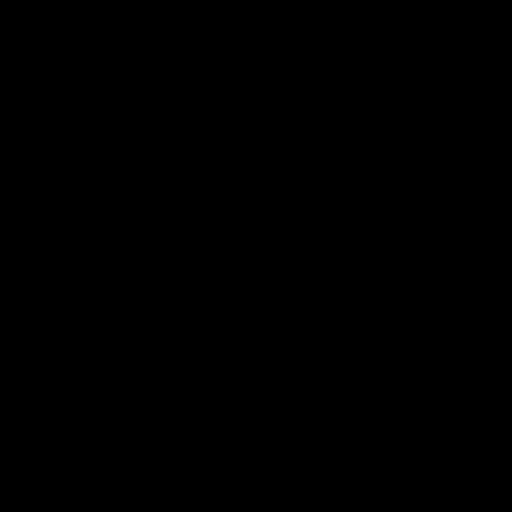

In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"
ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif(torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
    
print(f"Using Device: {DEVICE}")

tokenizer = CLIPTokenizer("../Data/vocab.json",merges_file = "../Data/merges.txt")
model_file = "../Data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file,DEVICE)

## TEXT TO IMAGE

prompt = "A golden retriever dog, highly detailed,ultra sharp,cinematic"
uncond_prompt = ""  ## Can use it  as negative prompt
do_cfg = True
cfg_scale = 7

# IMAGE TO IMAGE
input_image = None
strength = 0.9

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer
)

Image.fromarray(output_image)

In [1]:
import diffusion

obj = diffusion.UNET()
for name, params in obj.named_parameters():
    print(name)

encoders.0.0.weight
encoders.0.0.bias
encoders.1.0.groupnorm_feature.weight
encoders.1.0.groupnorm_feature.bias
encoders.1.0.conv_feature.weight
encoders.1.0.conv_feature.bias
encoders.1.0.linear_time.weight
encoders.1.0.linear_time.bias
encoders.1.0.groupnorm_merged.weight
encoders.1.0.groupnorm_merged.bias
encoders.1.0.conv_merged.weight
encoders.1.0.conv_merged.bias
encoders.1.1.groupnorm.weight
encoders.1.1.groupnorm.bias
encoders.1.1.conv_input.weight
encoders.1.1.conv_input.bias
encoders.1.1.layernorm_1.weight
encoders.1.1.layernorm_1.bias
encoders.1.1.attention_1.in_proj.weight
encoders.1.1.attention_1.out_proj.weight
encoders.1.1.attention_1.out_proj.bias
encoders.1.1.layernorm_2.weight
encoders.1.1.layernorm_2.bias
encoders.1.1.attention_2.q_proj.weight
encoders.1.1.attention_2.k_proj.weight
encoders.1.1.attention_2.v_proj.weight
encoders.1.1.attention_2.out_proj.weight
encoders.1.1.attention_2.out_proj.bias
encoders.1.1.layernorm_3.weight
encoders.1.1.layernorm_3.bias
encoder